In [2]:
import pandas as pd
import numpy as np

In [3]:
# want to use agglometrive clustering - similarity based cluster merging
# need lots of small clusters
# https://arc.net/l/quote/fzvgzwab


In [4]:
MUSIC_FEATURES_FP = 'data_music_features/processed_spotify_sample.csv'

In [5]:
df = pd.read_csv(MUSIC_FEATURES_FP)


In [8]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'encoded_genre'],
      dtype='object')

In [54]:
#subset columns for clustering
X = df[['explicit','danceability', 'energy', 'key', 'loudness', 'mode', 
        'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
        'valence', 'tempo', 'time_signature', 'encoded_genre']]
X = X.dropna()

In [55]:
X

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,encoded_genre
0,0,0.686294,0.4610,1,0.791392,0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,4,0
1,0,0.426396,0.1660,1,0.597377,1,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,4,0
2,0,0.444670,0.3590,0,0.736123,1,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,4,0
3,0,0.270051,0.0596,0,0.573701,1,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,3,0
4,0,0.627411,0.4430,2,0.737103,1,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104587,1,0.810152,0.6840,2,0.821135,1,0.174093,0.030823,0.000159,0.4790,0.559799,0.390086,4,104
104588,0,0.598985,0.1200,5,0.685866,1,0.038756,0.902610,0.000023,0.1090,0.370854,0.440063,4,104
104589,0,0.467005,0.2920,11,0.695651,1,0.029119,0.374498,0.229000,0.1700,0.358794,0.652935,3,104
104590,0,0.562437,0.8980,0,0.774818,1,0.049119,0.007349,0.833000,0.4780,0.857286,0.465497,1,104


### MiniBatch K-Means

In [56]:
from sklearn.cluster import MiniBatchKMeans

In [57]:
kmeans = MiniBatchKMeans(n_clusters=500,
                         random_state=0,
                         #batch_size=6,
                         max_iter=10,
                         n_init="auto",
                         reassignment_ratio=0.1).fit(X)

In [58]:
labels = kmeans.predict(X)

In [59]:
pd.Series(labels).value_counts()

80     537
244    471
387    451
464    437
499    429
      ... 
365     63
227     63
191     61
465     49
24      48
Name: count, Length: 500, dtype: int64

In [60]:
pd.Series(labels).value_counts()[pd.Series(labels).value_counts() < 100].index

Index([427, 301,  93, 216, 334, 319, 348, 385, 302, 478, 210, 363, 282, 454,
       109, 113,  75, 412, 295,  89, 125, 233, 365, 227, 191, 465,  24],
      dtype='int32')

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs

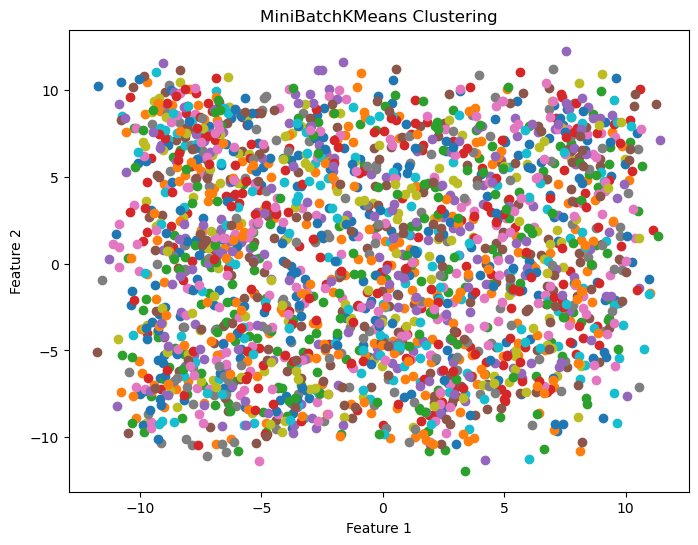

In [75]:
# Generate synthetic data
n_samples = 104592
n_features = 2
n_clusters = 500
random_state = 42

X2, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Apply MiniBatchKMeans
#kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=random_state, batch_size=50)
#labels2 = kmeans.fit_predict(X)

# Plot results
plt.figure(figsize=(8, 6))
for cluster in pd.Series(labels).value_counts()[pd.Series(labels).value_counts() < 100].index:
   plt.scatter(X2[labels == cluster, 0], X2[labels == cluster, 1], label=f'Cluster {cluster}')
    
# Plot cluster centers
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
#             c='black', marker='X', s=200, label='Centroids')

#plt.legend()
plt.title("MiniBatchKMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [61]:
X.index

RangeIndex(start=0, stop=104592, step=1)

In [62]:
df.index

RangeIndex(start=0, stop=104592, step=1)

In [64]:
X['cluster'] = labels
df['cluster'] = None
df.loc[X.index, 'cluster'] = X['cluster']

In [72]:
test_song_idx = np.random.randint(0, df.shape[0], 1)
display(df.iloc[test_song_idx])
possible_recs = df[df['cluster'] == df.iloc[test_song_idx]['cluster'].values[0]]
possible_recs.loc[np.random.choice(possible_recs.index, 5)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,encoded_genre,cluster
28751,29896,7nwVLrbEvFNH5sdPepvHjl,Dion Timmer;Excision;Monika Santucci,Subsidia Dawn: Vol. 4,Broken Pieces,0.22,0.040434,0,0.535025,0.935,...,0.044456,0.015863,0.000003,0.089,0.155779,0.419379,4,dubstep,28,314


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,encoded_genre,cluster
27347,28490,39N0x2bHHkTqTUiI4iYOBl,SLANDER;Dylan Matthew;Armin van Buuren,A State Of Trance Year Mix 2021 (Mixed by Armi...,Love Is Gone (Mixed) - Armin van Buuren Remix,0.47,0.015504,0,0.551269,0.944,...,0.045907,0.000285,0.03960,0.7530,0.394975,0.534207,4,dub,27,314
28829,29974,6LR3DEPjNAIQfpmrT7ishi,MitiS;SOUNDR,Lost,Homesick (feat. SOUNDR),0.41,0.062680,0,0.379695,0.659,...,0.045389,0.246988,0.00104,0.0991,0.151759,0.714511,4,dubstep,28,314
27002,28145,5mcxpGvbTqusAuJNYGiO4O,Sugar Minott,Sugar Minott Masterpiece,We've Got A Good Thing Going,0.39,0.044080,0,0.861929,0.525,...,0.204145,0.164659,0.00000,0.0399,0.881407,0.323542,4,dub,27,314
27515,28658,3tfxzJZYkX0pyruhffxcl1,Riot Ten;H&D,Money Walk,Money Walk,0.48,0.034226,1,0.829442,0.781,...,0.263212,0.011145,0.00000,0.0971,0.279397,0.308482,4,dub,27,314
27857,29001,6pooRNiLyYpxZeIA5kJ5EX,ILLENIUM;Jon Bellion,Good Things Fall Apart (with Jon Bellion),Good Things Fall Apart (with Jon Bellion),0.64,0.041370,0,0.652792,0.594,...,0.032953,0.012851,0.00000,0.1180,0.444221,0.591822,4,dubstep,28,314


In [77]:
display(df.iloc[test_song_idx][['track_name','artists','track_genre','cluster']])
possible_recs.loc[np.random.choice(possible_recs.index, 5)][['track_name','artists','track_genre','cluster']]

,track_name,artists,track_genre,cluster
28751,Broken Pieces,Dion Timmer;Excision;Monika Santucci,dubstep,314


,track_name,artists,track_genre,cluster
28399,Slipping Away feat Cheney - Original Mix,BH;Kirk Cosier;Cheney,dubstep,314
28487,Wide Awake,Outwild,dubstep,314
28763,better when im next to u,nøll,dubstep,314
27416,Liar (with OST),Kayzo;OST,dub,314
28079,Cheatcode,Black Tiger Sex Machine;Hairitage;Hyro The Hero,dubstep,314


In [ ]:
df.to_csv('data_music_features/clustered_spotify_sample.csv', index=False)

In [73]:
import pickle


In [74]:
# save
with open('022425_mbkmeans.pkl','wb') as f:
    pickle.dump(kmeans,f)

### Agglomerative

In [5]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
clustering = AgglomerativeClustering(n_clusters=500, linkage='single').fit(X)
clustering.labels_

array([  0,   0,   0, ...,   0, 132,   0])

In [11]:
pd.Series(clustering.labels_).value_counts()

0      103422
5          98
20         68
25         52
13         26
        ...  
139         1
124         1
73          1
174         1
137         1
Name: count, Length: 500, dtype: int64

sparse asf. not good for our use case

In [12]:
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.1, linkage='single').fit(X)
clustering.labels_

array([51691, 86625, 71901, ...,  2873,  8555,  4055])

In [13]:
pd.Series(clustering.labels_).value_counts()

1729     42
3095     38
3464     38
5459     36
3985     36
         ..
5277      1
10944     1
2903      1
8708      1
57349     1
Name: count, Length: 91156, dtype: int64

wayyy to many clusters

### Birch

In [6]:
# implements agglo but online
from sklearn.cluster import Birch

In [10]:
brc = Birch(n_clusters=500) #do same as before hoping for 10 clusters per genre
brc.fit(X)
labels = brc.predict(X)

In [13]:
pd.Series(labels).value_counts()

42     708
60     682
96     584
71     566
45     553
      ... 
366      4
394      4
497      3
417      3
498      2
Name: count, Length: 500, dtype: int64

In [12]:
pd.Series(labels).value_counts()[pd.Series(labels).value_counts() < 20]

82     19
264    18
113    17
348    17
152    17
       ..
366     4
394     4
497     3
417     3
498     2
Name: count, Length: 78, dtype: int64

In [ ]:
# timed out
# brc = Birch(threshold=0.1, branching_factor=20) #do same as before hoping for 10 clusters per genre
# brc.fit(X)
# labels = brc.predict(X)

In [ ]:
pd.Series(labels).value_counts()

In [ ]:
# Birch()
# pd.Series(labels).value_counts()

0    44217
1    32968
2    27407
Name: count, dtype: int64

In [19]:
brc = Birch(n_clusters=AgglomerativeClustering(n_clusters=None, distance_threshold=0.5, linkage='single'))
brc.fit(X)
labels = brc.predict(X)

In [20]:
pd.Series(labels).value_counts()

6634    153
6958    151
3409    148
7046    136
6153    133
       ... 
4560      1
2553      1
8417      1
8072      1
1279      1
Name: count, Length: 9867, dtype: int64

distance_threshold = 0.1 gave 10621
distance_threshold = 0.5 gave 9867
some clusters have too few datapoints

In [ ]:
X.shape[0]
# 500 clusters will give lists of ~20

104592

### HDBSCAN

In [ ]:
from sklearn.cluster import HDBSCAN

In [ ]:
# brc = Birch(n_clusters=HDBSCAN(min_cluster_size=10, max_cluster_size=20))
# brc.fit(X)
# labels = brc.predict(X)

In [ ]:
# pd.Series(labels).value_counts()

-1     99276
 6       445
 15      421
 7       392
 16      382
 14      363
 9       344
 2       340
 10      317
 5       311
 4       301
 20      270
 3       210
 19      206
 8       199
 18      180
 13      179
 12      170
 11      131
 17      120
 1        21
 0        14
Name: count, dtype: int64

In [ ]:
from sklearn.cluster import HDBSCAN

### CURE

In [25]:
from pyclustering.cluster.cure import cure

ModuleNotFoundError: No module named 'pyclustering'